In [1]:
from qubecalib import Qube, LongSend, Recv
import qubecalib.qube
QUBE = Qube(config_file_name='qube_riken_1-10.yml')
QUBE.config

{'bitfile': '0d5ea1.bit',
 'ipfpga': '10.1.0.28',
 'iplsi': '10.5.0.28',
 'macfpga': '00-0A-35-0D-5E-A1',
 'maclsi': '00-1B-1A-EE-01-27',
 'type': 'A'}

In [112]:
QUBE.config

{'bitfile': '0d5ea1.bit',
 'ipfpga': '10.1.0.28',
 'iplsi': '10.5.0.28',
 'macfpga': '00-0A-35-0D-5E-A1',
 'maclsi': '00-1B-1A-EE-01-27',
 'type': 'A'}

In [38]:
QUBE.config_fpga()

'\n****** Vivado v2020.1 (64-bit)\n  **** SW Build 2902540 on Wed May 27 19:54:35 MDT 2020\n  **** IP Build 2902112 on Wed May 27 22:43:36 MDT 2020\n    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.\n\nsource ./adi_api_mod/utils/config.tcl\n# open_hw_manager\n# connect_hw_server -allow_non_jtag\nINFO: [Labtools 27-2285] Connecting to hw_server url TCP:localhost:3121\nINFO: [Labtools 27-2222] Launching hw_server...\nINFO: [Labtools 27-2221] Launch Output:\n\n****** Xilinx hw_server v2020.1\n  **** Build date : May 27 2020 at 20:33:44\n    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.\n\n\nINFO: [Labtools 27-3415] Connecting to cs_server url TCP:localhost:3042\nINFO: [Labtools 27-3417] Launching cs_server...\nINFO: [Labtools 27-2221] Launch Output:\n\n\n****** Xilinx cs_server v2020.1.0\n  **** Build date : May 14 2020-10:10:29\n    ** Copyright 2017-2020 Xilinx, Inc. All Rights Reserved.\n\n\n\n# open_hw_target\nINFO: [Labtoolstcl 44-466] Opening hw_target localhos

In [ ]:
QUBE.do_init(message_out=False)
print(QUBE.ad9082[0].get_jesd_status())
print(QUBE.ad9082[1].get_jesd_status())

In [31]:
[o.do_init(message_out=False) for o in QUBE.ad9082]
print(QUBE.ad9082[0].get_jesd_status())
print(QUBE.ad9082[1].get_jesd_status())

[['0x55E', '0xE0'], ['0x5BB', '0x01'], ['0x62E', '0x01'], ['pll_status', '0x01'], ['0x728', '0x0B']]
[['0x55E', '0xE0'], ['0x5BB', '0x01'], ['0x62E', '0x01'], ['pll_status', '0x01'], ['0x728', '0x0B']]


In [2]:
print(QUBE.ad9082[0].get_jesd_status())
print(QUBE.ad9082[1].get_jesd_status())

KeyboardInterrupt: 

In [41]:
QUBE.port[0].upconv.lsi.mode = qubecalib.qube.ConvMode.USB
QUBE.port[13].upconv.lsi.mode = qubecalib.qube.ConvMode.USB
['{}: {}'.format(k, v.status) for k, v in QUBE.port.items()]

['0: RF = 13000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: USB MODE AWG: Inactive',
 '1: RF = 13000.000 MHz LO = 12000    MHz IF = 1000.000 MHz ',
 '5: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '6: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '7: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '8: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive',
 '12: RF = 13000.000 MHz LO = 12000    MHz IF = 1000.000 MHz ',
 '13: RF = 13000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: USB MODE AWG: Inactive']

In [7]:
nco_mhz, awg_mhz = QUBE.port[0].set_freq(10109.5, 8000)
#QUBE.port[0].upconv.vatt = 0x380
QUBE.port[0].upconv.vatt = 0x800
QUBE.port[1].adc.nco.freq = nco_mhz
nco_mhz, awg_mhz = QUBE.port[5].set_freq(10119.5, 11000)
print(nco_mhz, awg_mhz)
QUBE.port[5].dac.nco.freq = nco_mhz
QUBE.port[5].upconv.vatt = 0x7b0
#print(10109.5 + 906.25 - 11000)

print(QUBE.port[0].status)
print(QUBE.port[1].status)
print(QUBE.port[5].status)

875.0 5.5
RF = 10109.375 MHz LO =  8000    MHz IF = 2109.375 MHz LSB/USB: USB MODE AWG: Inactive
RF = 10109.375 MHz LO =  8000    MHz IF = 2109.375 MHz 
RF = 10125.000 MHz LO = 11000    MHz IF = 875.000 MHz LSB/USB: LSB MODE AWG: Inactive


In [47]:
LongSend.start(QUBE.port[13])

In [116]:
LongSend.stop(QUBE.port[13])

In [115]:
QUBE.port[13].upconv.lsi.mode = qubecalib.qube.ConvMode.USB

0: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz LSB/USB: USB MODE AWG: Inactive
1: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz 
5: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
6: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
7: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
8: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
12: RF = 10109.375 MHz LO =  8000    MHz IF = 2109.375 MHz 
13: RF = 10109.375 MHz LO =  8000    MHz IF = 2109.375 MHz LSB/USB: USB MODE AWG: Active
awg: 0.125 MHz


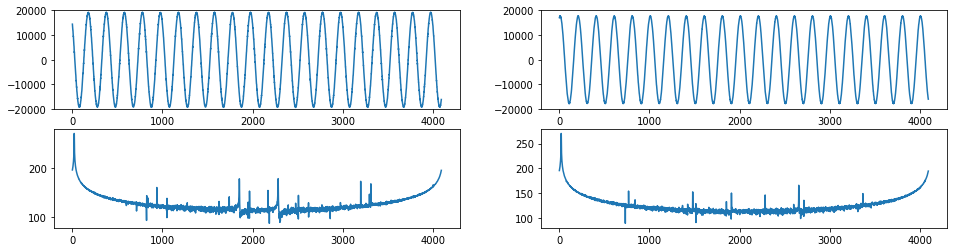

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from e7awgsw import CaptureUnit
import numpy as np
from numpy import array, real, imag, abs, log
from numpy.fft import fft

convert = lambda x: x[:,0] + 1j * x[:,1]

nco_mhz, awg_mhz = QUBE.port[13].set_freq(10109.5, 8000)
QUBE.port[12].adc.nco.freq = nco_mhz

[print('{}: {}'.format(k, v.status)) for k, v in QUBE.port.items()]

d = Recv.start(QUBE.port[12])
x = convert(array(d[CaptureUnit.U0]))

fig, ax = plt.subplots(2,2,figsize=(16,4))
ax[0,0].plot(real(x))
ax[0,0].set_ylim(-2e+4,2e+4)
ax[1,0].plot(20*log(abs(fft(x,norm='ortho'))))


nco_mhz, awg_mhz = QUBE.port[13].set_freq(10109.5, 8500)
QUBE.port[12].adc.nco.freq = nco_mhz
print('awg: {} MHz'.format(awg_mhz))

d = Recv.start(QUBE.port[12])
x = convert(array(d[CaptureUnit.U0]))

ax[0,1].plot(real(x))
ax[0,1].set_ylim(-2e+4,2e+4)
ax[1,1].plot(20*log(abs(fft(x,norm='ortho'))))

# 無信号出力時の雑音

LO を 8000, 9000 にしたとき，大きな雑音が重畳される（スプリアスか？）Rxの発振？

0: RF = 10109.375 MHz LO =  8000    MHz IF = 2109.375 MHz LSB/USB: USB MODE AWG: Inactive
1: RF = 10109.375 MHz LO =  8000    MHz IF = 2109.375 MHz 
0: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz LSB/USB: USB MODE AWG: Inactive
1: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz 
awg: 0.125 MHz


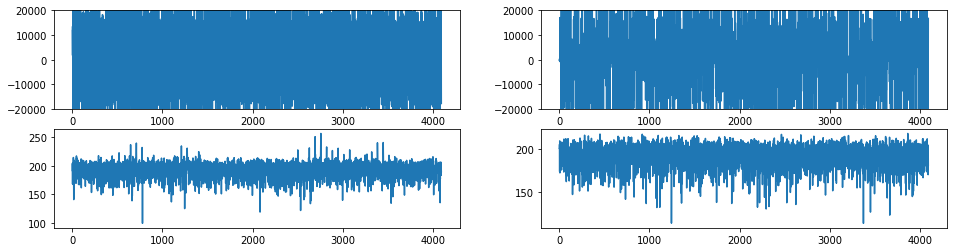

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from e7awgsw import CaptureUnit
import numpy as np
from numpy import array, real, imag, abs, log
from numpy.fft import fft

convert = lambda x: x[:,0] + 1j * x[:,1]

LongSend.stop(QUBE.port[0])

nco_mhz, awg_mhz = QUBE.port[0].set_freq(10109.5, 8000)
QUBE.port[1].adc.nco.freq = nco_mhz
print('0: {}'.format(QUBE.port[0].status))
print('1: {}'.format(QUBE.port[1].status))


d = Recv.start(QUBE.port[1])
x = convert(array(d[CaptureUnit.U4]))

fig, ax = plt.subplots(2,2,figsize=(16,4))
ax[0,0].plot(real(x))
ax[0,0].set_ylim(-2e+4,2e+4)
ax[1,0].plot(20*log(abs(fft(x,norm='ortho'))))


nco_mhz, awg_mhz = QUBE.port[0].set_freq(10109.5, 8500)
QUBE.port[1].adc.nco.freq = nco_mhz
print('0: {}'.format(QUBE.port[0].status))
print('1: {}'.format(QUBE.port[1].status))
print('awg: {} MHz'.format(awg_mhz))

d = Recv.start(QUBE.port[1])
x = convert(array(d[CaptureUnit.U4]))

ax[0,1].plot(real(x))
ax[0,1].set_ylim(-2e+4,2e+4)
ax[1,1].plot(20*log(abs(fft(x,norm='ortho'))))

5: RF = 10125.000 MHz LO = 11000    MHz IF = 875.000 MHz LSB/USB: LSB MODE AWG: Inactive
awg: 5.5 MHz


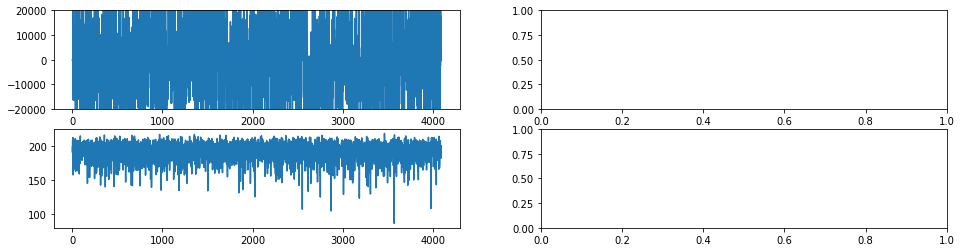

In [118]:
nco_mhz, awg_mhz = QUBE.port[5].set_freq(10119.5, 11000)
QUBE.port[5].upconv.vatt = 0x7b0
print('5: {}'.format(QUBE.port[5].status))
print('awg: {} MHz'.format(awg_mhz))

d = Recv.start(QUBE.port[1])
x = convert(array(d[CaptureUnit.U4]))

fig, ax = plt.subplots(2,2,figsize=(16,4))
ax[0,0].plot(real(x))
ax[0,0].set_ylim(-2e+4,2e+4)
ax[1,0].plot(20*log(abs(fft(x,norm='ortho'))))


# 制御パルス

- 波形ブロックぐらいの間隔で位相が揺らぐ

```
capture_param.capture_delay = ctrl_wave_seq.num_wait_words + ctrl_wave_seq.chunk(0).num_wave_words
capture_param.capture_delay += ADDITIONAL_CAPTURE_DELAY
```
ここの計算の影響？

1 WaveBlock の単位で Ctrl のお尻がアライメントされるのが正しい処理では？

- 積算時に Ctrl が潰れるのは正しいか？

['0: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz LSB/USB: USB MODE AWG: Inactive', '1: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz ', '5: RF = 10125.000 MHz LO = 11000    MHz IF = 875.000 MHz LSB/USB: LSB MODE AWG: Inactive', '6: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive', '7: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive', '8: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive', '12: RF = 9218.750 MHz LO =  8000    MHz IF = 1218.750 MHz ', '13: RF = 9218.750 MHz LO =  8000    MHz IF = 1218.750 MHz LSB/USB: USB MODE AWG: Inactive']


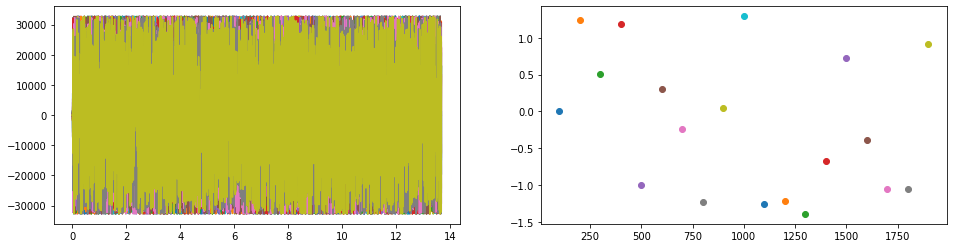

In [120]:
import math

DEBUG = False

NUM_OFFSET_BLOCKS = 20 # 128 [ns/block] x 20 [blocks] = 2.56 [us]

convert = lambda x: x[:,0] + 1j * x[:,1]

nco_mhz, awg_mhz = QUBE.port[0].set_freq(10109.5, 8500)
QUBE.port[0].upconv.vatt = 0x600

QUBE.port[1].adc.nco.freq = nco_mhz

nco_mhz, awg_mhz = QUBE.port[5].set_freq(10119.5, 11000)
QUBE.port[5].upconv.vatt = 0x7b0

print(['{}: {}'.format(k, v.status) for k, v in QUBE.port.items()])

fig, ax = plt.subplots(1, 2, figsize=(16,4))
for c in range(100,2000,100):
    prm = wave_params(
        num_wait_words = 0,
        ctrl_freq = 5.5, # MHz
        ctrl_wave_len = c, # ns
        readout_freq = 0.125, # MHz,
        readout_wave_len = 10000, # ns,
        readout_blank_len = 0.1, # ms
        num_chunk_repeats = 1, # 積算回数
        ctrl_amp = 32767, # 17500 -> 81.3 mV
        readout_amp = 32767,
    )
    
    s = slice(2000,6000)
    # s = slice(0,-1)
    d = rabi_meas(prm)
    x = convert(array(d[CaptureUnit.U4]))
    time = np.linspace(0, 1e+6 * x.shape[0] / CaptureCtrl.SAMPLING_RATE, x.shape[0])# - c * 1e-3
    
    y = x * np.exp(-1j*2*np.pi*prm.readout_freq*time)
    ax[0].plot(time, real(x))
    # ax[0].plot(time[s], real(x)[s])
    
    z = y[s].mean()
    z = z / np.abs(z)
    if c == 100:
        z0 = z
    z = np.sqrt(z * z0.conj())
    ax[1].plot(c, np.angle(z),'o')


サンプリング時間の推移 (time - c) で計算したらドンピシャに合う

0: RF = 10125.000 MHz LO =  8500    MHz IF = -1625.000 MHz LSB/USB: LSB MODE AWG: Inactive
1: RF = 6875.000 MHz LO =  8500    MHz IF = -1625.000 MHz 
5: RF = 10125.000 MHz LO = 11000    MHz IF = 875.000 MHz LSB/USB: LSB MODE AWG: Inactive


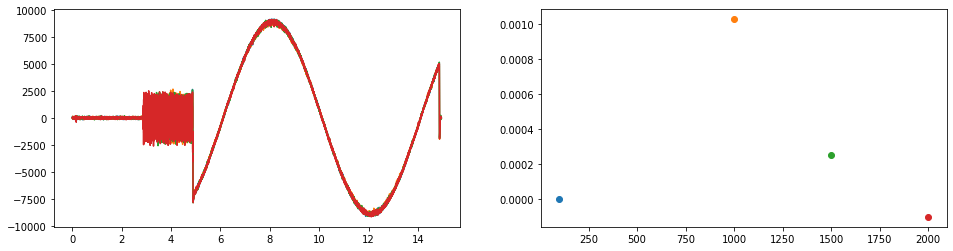

In [479]:
import math

DEBUG = True
NUM_OFFSET_BLOCKS = 30 # 128 [ns/block] x 100 [blocks] = 12.8 [us]

convert = lambda x: x[:,0] + 1j * x[:,1]


nco_mhz, awg_mhz = QUBE.port[0].set_freq(10109.5, 8500)
QUBE.port[0].upconv.vatt = 0x600
print('0: {}'.format(QUBE.port[0].status))

QUBE.port[1].adc.nco.freq = nco_mhz
print('1: {}'.format(QUBE.port[1].status))

nco_mhz, awg_mhz = QUBE.port[5].set_freq(10119.5, 11000)
QUBE.port[5].upconv.vatt = 0x6b0
print('5: {}'.format(QUBE.port[5].status))

fig, ax = plt.subplots(1, 2, figsize=(16,4))
for c in [100,1000, 1500, 2000]:#range(100,2000,100):
    prm = wave_params(
        num_wait_words = 0,
        ctrl_freq = 5.5, # MHz
        ctrl_wave_len = c, # ns
        readout_freq = 0.125, # MHz,
        readout_wave_len = 10000, # ns,
        readout_blank_len = 0.1, # ms
        num_chunk_repeats = 1, # 積算回数
        ctrl_amp = 32767, # 17500 -> 81.3 mV
        readout_amp = 32767,
    )
    
    #s = slice(2000,5000)
    s = slice(0,-1)
    d = rabi_meas(prm)
    x = convert(array(d[CaptureUnit.U4]))
    time = np.linspace(0, 1e+6 * x.shape[0] / CaptureCtrl.SAMPLING_RATE, x.shape[0])# - c * 1e-3
    y = x * np.exp(-1j*2*np.pi*prm.readout_freq*time)
    z = y[s].mean()
    z = z / np.abs(z)
    if c == 100:
        z0 = z
    z = np.sqrt(z * z0.conj())
    ax[0].plot(time[s], real(x)[s])
    ax[1].plot(c, np.angle(z),'o')
    #ax[1].axis('equal')
    #plt.show()

0: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz LSB/USB: USB MODE AWG: Inactive
1: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz 
5: RF = 10125.000 MHz LO = 11000    MHz IF = 875.000 MHz LSB/USB: LSB MODE AWG: Inactive
6: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
7: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
8: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
12: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz 
13: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz LSB/USB: USB MODE AWG: Inactive


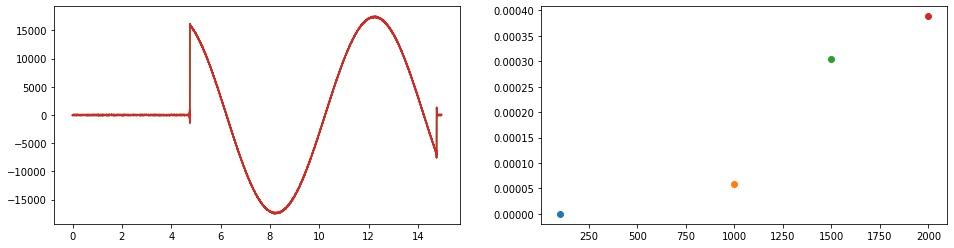

In [121]:
import math

DEBUG = True
NUM_OFFSET_BLOCKS = 30 # 128 [ns/block] x 100 [blocks] = 12.8 [us]

convert = lambda x: x[:,0] + 1j * x[:,1]

QUBE.port[13].upconv.lsi.mode = qubecalib.qube.ConvMode.USB

nco_mhz, awg_mhz = QUBE.port[13].set_freq(10109.5, 8500)
QUBE.port[13].upconv.vatt = 0x600

QUBE.port[12].adc.nco.freq = nco_mhz

nco_mhz, awg_mhz = QUBE.port[5].set_freq(10119.5, 11000)
QUBE.port[5].upconv.vatt = 0x6b0

[print('{}: {}'.format(k, v.status)) for k, v in QUBE.port.items()]

fig, ax = plt.subplots(1, 2, figsize=(16,4))
for c in [100,1000, 1500, 2000]:#range(100,2000,100):
    prm = wave_params(
        num_wait_words = 0,
        ctrl_freq = 5.5, # MHz
        ctrl_wave_len = c, # ns
        readout_freq = 0.125, # MHz,
        readout_wave_len = 10000, # ns,
        readout_blank_len = 0.1, # ms
        num_chunk_repeats = 1, # 積算回数
        ctrl_amp = 32767, # 17500 -> 81.3 mV
        readout_amp = 32767,
    )
    
    #s = slice(2000,5000)
    s = slice(0,-1)
    d = rabi_meas(prm)
    x = convert(array(d[CaptureUnit.U0]))
    time = np.linspace(0, 1e+6 * x.shape[0] / CaptureCtrl.SAMPLING_RATE, x.shape[0])# - c * 1e-3
    y = x * np.exp(-1j*2*np.pi*prm.readout_freq*time)
    z = y[s].mean()
    z = z / np.abs(z)
    if c == 100:
        z0 = z
    z = np.sqrt(z * z0.conj())
    ax[0].plot(time[s], real(x)[s])
    ax[1].plot(c, np.angle(z),'o')
    #ax[1].axis('equal')
    #plt.show()

# Rabi Vibration

14.375 9217.5
6.600000000000364 7555.9
0: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz LSB/USB: USB MODE AWG: Inactive
1: RF = 10109.375 MHz LO =  8500    MHz IF = 1609.375 MHz 
5: RF = 7562.500 MHz LO =  9000    MHz IF = 1437.500 MHz LSB/USB: LSB MODE AWG: Inactive
6: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
7: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
8: RF = 11000.000 MHz LO = 12000    MHz IF = 1000.000 MHz LSB/USB: LSB MODE AWG: Inactive
12: RF = 9203.125 MHz LO =  8000    MHz IF = 1203.125 MHz 
13: RF = 9203.125 MHz LO =  8000    MHz IF = 1203.125 MHz LSB/USB: USB MODE AWG: Inactive
10 30 50 70 90 110 130 150 170 190 210 230 250 270 290 

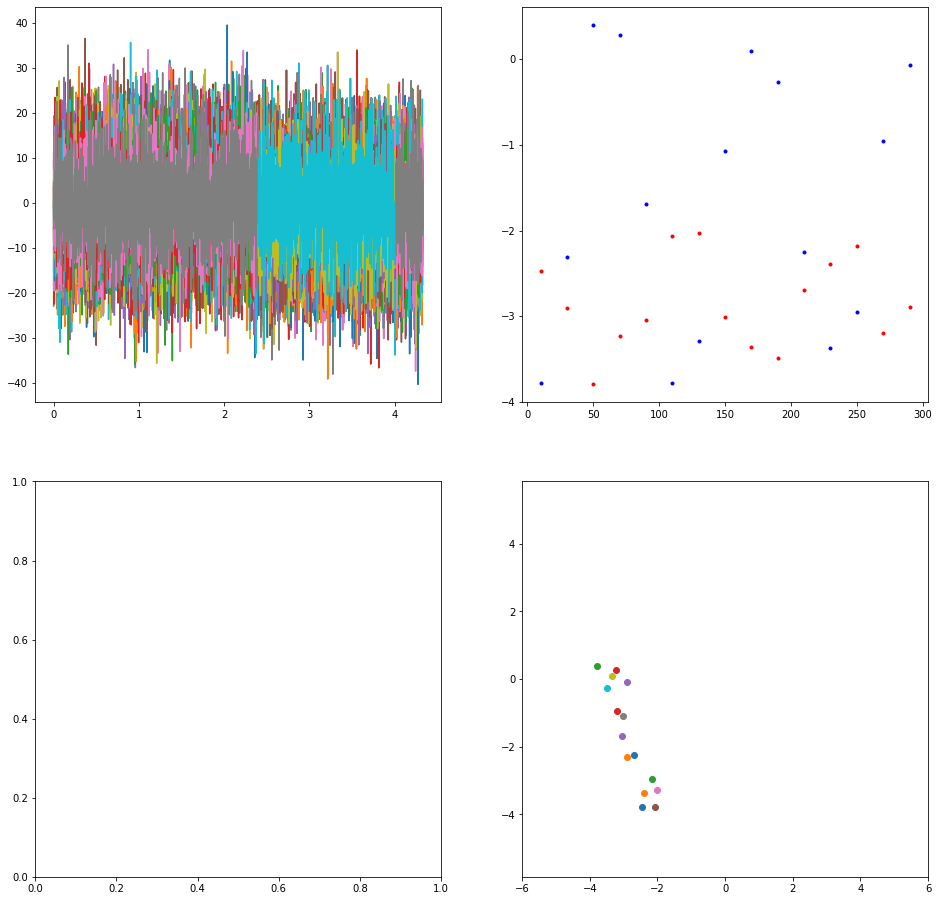

In [170]:
from collections import namedtuple
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, real, imag, abs, log
from e7awgsw import CaptureUnit
from numpy.fft import fft



DEBUG = False

convert = lambda x: x[:,0] + 1j * x[:,1]


#READOUT_TARGET_FREQUENCY = 9217.5 # Hz
READOUT_TARGET_FREQUENCY = 9217.5 # Hz
#CTRL_TARGET_FREQUENCY = 7556.5 # MHz
CTRL_TARGET_FREQUENCY = 7555.9 # MHz
NUM_OFFSET_BLOCKS = 10 # 128 [ns/block] x 100 [blocks] = 12.8 [us]
readout_lo_mhz = 8000
ctrl_lo_mhz = 9000


wave_params = namedtuple(
    'WaveParams',
    ('num_wait_words',
     'ctrl_freq',
     'ctrl_wave_len',
     'readout_freq',
     'readout_wave_len',
     'readout_blank_len',
     'num_chunk_repeats',
     'ctrl_amp',
     'readout_amp',
    ))

# DAC の NCO と Readout の LMX の設定
nco_mhz, awg_mhz = QUBE.port[13].set_freq(READOUT_TARGET_FREQUENCY, readout_lo_mhz)
readout_vatt = 0x500
QUBE.port[13].upconv.vatt = readout_vatt
readout_awg_mhz = awg_mhz
readout_rf_mhz = nco_mhz + readout_lo_mhz + awg_mhz
print(awg_mhz, readout_rf_mhz)

# Readin の LMX は Readout と同じ値
QUBE.port[12].adc.nco.freq = nco_mhz # ADC の NCO の設定

nco_mhz, awg_mhz = QUBE.port[5].set_freq(CTRL_TARGET_FREQUENCY, ctrl_lo_mhz)
ctrl_awg_mhz = awg_mhz
ctrl_vatt = 0x400
QUBE.port[5].upconv.vatt = ctrl_vatt
# QUBE.port[5].upconv.vatt = 0x000
ctrl_rf_mhz = ctrl_lo_mhz - nco_mhz - awg_mhz
print(awg_mhz, ctrl_rf_mhz)

[print('{}: {}'.format(k, v.status)) for k, v in QUBE.port.items()]

rslt = {
    'ctrl_vatt': ctrl_vatt,
    'readout_vatt': readout_vatt,
    'readout_rf_mhz': readout_rf_mhz,
    'readout_lo_mhz': readout_lo_mhz,
    'ctrl_rf_mhz': ctrl_rf_mhz,
    'ctrl_lo_mhz': ctrl_lo_mhz,
    'data': [],
}

#for readout_awg_mhz in range(1,16):

fig, ax = plt.subplots(2, 2, figsize=(16,16))
for c in range(10, 300, 20):#[100, 500, 1000, 1500, 2000]:#range(100,2000,100):

    prm = wave_params(
        num_wait_words = 0,
        ctrl_freq = ctrl_awg_mhz, # MHz
        ctrl_wave_len = c, # ns
        readout_freq = readout_awg_mhz, # MHz,
        readout_wave_len = 2000, # ns,
        readout_blank_len = 0.1, # ms
        num_chunk_repeats = 10000, # 積算回数
        # ctrl_amp = 16383, # 17500 -> 81.3 mV
        ctrl_amp = 32767, # 17500 -> 81.3 mV
        # ctrl_amp = 0,
        # readout_amp = 32767,
        readout_amp = 8191,
        # readout_amp = 9830, # -10dB
    )
    
    print(c, end=' ', flush=True)
    d = rabi_meas(prm)
    
    rslt['data'].append({
        'wparams': prm._asdict(),
        'data': d,
    })
    
    s = slice(1200,2000)
    
    x = convert(array(d[CaptureUnit.U0]))
    time = np.linspace(0, 1e+6 * x.shape[0] / CaptureCtrl.SAMPLING_RATE, x.shape[0])# - c * 1e-3
    #ax[0].plot(time, real(x))
    #ax[0].plot(time[s], real(x)[s])


    y = x * np.exp(-1j*2*np.pi*prm.readout_freq*time) / prm.num_chunk_repeats
    ax[0,0].plot(time, real(y))
    ax[0,0].plot(time, imag(y))
    ax[0,0].plot(time[s], real(y)[s])
    ax[0,0].plot(time[s], imag(y)[s])
    #ax[0].plot(time, np.abs(y))


    z = y[s].mean()
    z = z
    # if c == 100:
    #     z0 = z
    # z = np.sqrt(z * z0.conj())
    ax[0,1].plot(c,real(z),'r.')
    ax[0,1].plot(c,imag(z),'b.')
    ax[1,1].plot(real(z),imag(z),'o')
    ax[1,1].axis('equal')
    ax[1,1].set_xlim(-6,6)
    ax[1,1].set_ylim(-6,6)
    #ax[1].plot(c, np.angle(z),'o')

    
# import pickle, datetime
# n = datetime.datetime.now()
# with open('HandaiExpRabi20220421{}{}.pickle'.format(n.hour, n.minute), 'wb') as f:
#     pickle.dump(rslt, f)


In [166]:
import pickle, datetime
n = datetime.datetime.now()
with open('HandaiExpRabi20220425{}{}.pickle'.format(n.hour, n.minute), 'wb') as f:
    pickle.dump(rslt, f)

In [111]:
with open('HandaiExpRabi202204211455.pickle', 'rb') as f:
    r = pickle.load(f)

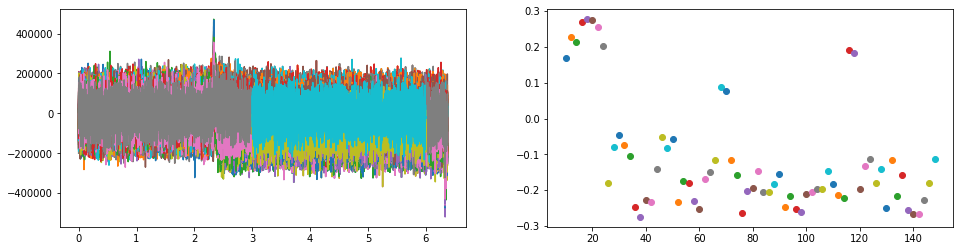

In [103]:
with open('HandaiExpRabi202204211455.pickle', 'rb') as f:
    r = pickle.load(f)

    fig, ax = plt.subplots(1, 2, figsize=(16,4))
for c, v in rslt.items():#[100, 500, 1000, 1500, 2000]:#range(100,2000,100):
    
    x = convert(array(v['data'][CaptureUnit.U4]))
    time = np.linspace(0, 1e+6 * x.shape[0] / CaptureCtrl.SAMPLING_RATE, x.shape[0])# - c * 1e-3
    #ax[0].plot(time, real(x))
    #ax[0].plot(time[s], real(x)[s])


    y = x * np.exp(-1j*2*np.pi*prm.readout_freq*time)
    ax[0].plot(time, real(y))
    ax[0].plot(time, imag(y))
    ax[0].plot(time[s], real(y)[s])
    ax[0].plot(time[s], imag(y)[s])
    #ax[0].plot(time, np.abs(y))


    z = y[s].mean()
    z = z / np.abs(z)
    # if c == 100:
    #     z0 = z
    # z = np.sqrt(z * z0.conj())
    #ax[1].plot(real(z),imag(z),'o')
    #ax[1].plot(c, np.angle(z),'o')
    ax[1].plot(c, np.imag(z),'o')


# 制御パルス送信コード

In [8]:
from collections import namedtuple
from e7awgsw import AWG, AwgCtrl, CaptureCtrl, CaptureModule, CaptureParam, DspUnit, SinWave, IqWave
from e7awgsw import WaveSequence
import numpy as np


ADDITIONAL_CAPTURE_DELAY = 0 # cpature words = cycyles @ 125MHz 

wave_params = namedtuple(
    'WaveParams',
    ('num_wait_words',
     'ctrl_freq',
     'ctrl_wave_len',
     'readout_freq',
     'readout_wave_len',
     'readout_blank_len',
     'num_chunk_repeats',
     'ctrl_amp',
     'readout_amp',
    ))


awg_list = namedtuple(
    'AwgList',
    ('ctrl_awg_0',
     'ctrl_awg_1',
     'readout_awg_0',
     'readout_awg_1'))


AWG_LIST = awg_list(
    ctrl_awg_0 = AWG.U11,
    ctrl_awg_1 = AWG.U0,
    readout_awg_0 = AWG.U2,
    readout_awg_1 = AWG.U15
)


def set_trigger_awg(cap_ctrl, awg, capture_modules):
    for cap_mod_id in capture_modules:
        cap_ctrl.select_trigger_awg(cap_mod_id, awg)
        cap_ctrl.enable_start_trigger(*CaptureModule.get_units(cap_mod_id))

        
def set_wave_sequence(awg_ctrl, params):
    
    def gen_cos_wave(freq, num_cycles, amp, sampling_rate):
        freq = freq * 1e6
        o = 2 * math.pi * num_cycles
        i_samples = SinWave(num_cycles = num_cycles, frequency = freq, amplitude = amp, phase = - o + math.pi / 2).gen_samples(sampling_rate)
        q_samples = SinWave(num_cycles = num_cycles, frequency = freq, amplitude = amp, phase = - o).gen_samples(sampling_rate)
        return (i_samples, q_samples)
    
    def gen_ctrl_wave_samples():
        
        num_cycles = params.ctrl_freq * params.ctrl_wave_len * 1e-3
        i, q = gen_cos_wave(params.ctrl_freq, num_cycles, params.ctrl_amp, AwgCtrl.SAMPLING_RATE)
        
        m = WaveSequence.NUM_SAMPLES_IN_WAVE_BLOCK
        padding = m - (len(i) % m)
        long_padding = (NUM_OFFSET_BLOCKS * m) - (padding + len(i))
        i = [0] * (long_padding + padding) + i
        q = [0] * (long_padding + padding) + q
        return (i, q)
    
    def gen_ctrl_wave_seq(num_all_samples, i_samples, q_samples):
        iq_samples = IqWave.convert_to_iq_format(i_samples, q_samples, WaveSequence.NUM_SAMPLES_IN_WAVE_BLOCK)
        num_blank_samples = num_all_samples - len(iq_samples)
        num_blank_words = num_blank_samples // WaveSequence.NUM_SAMPLES_IN_AWG_WORD

        wave_seq = WaveSequence(num_wait_words = params.num_wait_words, num_repeats = 1)
        wave_seq.add_chunk(
            iq_samples = iq_samples,
            num_blank_words = num_blank_words, 
            num_repeats = params.num_chunk_repeats
        )
        return wave_seq
    
    def gen_readout_wave_samples(num_pre_blank_samples):
        num_cycles = params.readout_freq * params.readout_wave_len * 1e-3
        i_samples, q_samples = gen_cos_wave(params.readout_freq, num_cycles, params.readout_amp, AwgCtrl.SAMPLING_RATE)
        i_samples = [0] * num_pre_blank_samples + i_samples
        q_samples = [0] * num_pre_blank_samples + q_samples
        return (i_samples, q_samples)

    def gen_readout_wave_seq(i_samples, q_samples):
        iq_samples = IqWave.convert_to_iq_format(i_samples, q_samples, WaveSequence.NUM_SAMPLES_IN_WAVE_BLOCK)
        # I/Q サンプルに付加された 0 データの分 readout 波形のブランクを短くする
        num_added_samples = len(iq_samples) - len(i_samples)
        num_blank_samples = max(
            int(AwgCtrl.SAMPLING_RATE * params.readout_blank_len / 1e3) - num_added_samples, 0) # 負にならないよう max(x,0)
        num_blank_words = num_blank_samples // WaveSequence.NUM_SAMPLES_IN_AWG_WORD

        wave_seq = WaveSequence(num_wait_words = params.num_wait_words, num_repeats = 1)
        wave_seq.add_chunk(
            iq_samples = iq_samples,
            num_blank_words = num_blank_words, 
            num_repeats = params.num_chunk_repeats
        )
        return wave_seq
    
    ctrl_i_samples, ctrl_q_samples = gen_ctrl_wave_samples() # サンプル作成
    ro_i_samples, ro_q_samples = gen_readout_wave_samples(len(ctrl_i_samples)) # サンプル作成
    
#     x = ctrl_i_samples
#     time = np.linspace(0, 1e+6 * len(x) / CaptureCtrl.SAMPLING_RATE, len(x))
#     plt.plot(time, array(x))
    
#     x = ro_i_samples
#     time = np.linspace(0, 1e+6 * len(x) / CaptureCtrl.SAMPLING_RATE, len(x))
#     plt.plot(time, array(x))
    
    ro_wave_seq = gen_readout_wave_seq(ro_i_samples, ro_q_samples) # 波形シーケンス作成
    ctrl_wave_seq = gen_ctrl_wave_seq(ro_wave_seq.chunk(0).num_samples, ctrl_i_samples, ctrl_q_samples)

    # control 波形と readout 波形の長さが一致することを確認
    assert ctrl_wave_seq.num_all_words == ro_wave_seq.num_all_words

    awg_ctrl.set_wave_sequence(AWG_LIST.ctrl_awg_0, ctrl_wave_seq)
    awg_ctrl.set_wave_sequence(AWG_LIST.ctrl_awg_1, ctrl_wave_seq)
    awg_ctrl.set_wave_sequence(AWG_LIST.readout_awg_0, ro_wave_seq)
    awg_ctrl.set_wave_sequence(AWG_LIST.readout_awg_1, ro_wave_seq)
    return {
        AWG_LIST.ctrl_awg_0 : ctrl_wave_seq,
        AWG_LIST.ctrl_awg_1 : ctrl_wave_seq,
        AWG_LIST.readout_awg_0 : ro_wave_seq,
        AWG_LIST.readout_awg_1 : ro_wave_seq
    }


def set_capture_params(cap_ctrl, ctrl_wave_seq, ro_wave_seq, capture_units):
    
    def gen_capture_param(ctrl_wave_seq, ro_wave_seq):
        capture_param = CaptureParam()
        capture_param.num_integ_sections = ro_wave_seq.chunk(0).num_repeats # 積算区間数

        # readout 波形の長さから, 追加で 1us キャプチャするためのキャプチャワード数を計算
        additional_capture_words = int(1e-6 * CaptureCtrl.SAMPLING_RATE) // CaptureParam.NUM_SAMPLES_IN_ADC_WORD
        additional_capture_words = min(additional_capture_words, ro_wave_seq.chunk(0).num_blank_words - 1)
        
        sum_section_len = ro_wave_seq.chunk(0).num_words - ro_wave_seq.chunk(0).num_blank_words + additional_capture_words
        num_blank_words = ro_wave_seq.chunk(0).num_words - sum_section_len

        if DEBUG:
            capture_param.add_sum_section(sum_section_len, num_blank_words)
            capture_param.sum_start_word_no = 0
            capture_param.num_words_to_sum = CaptureParam.MAX_SUM_SECTION_LEN
            # capture_param.sel_dsp_units_to_enable(DspUnit.INTEGRATION)
            capture_param.capture_delay = 0#ctrl_wave_seq.num_wait_words + ctrl_wave_seq.chunk(0).num_wave_words
            # capture_param.capture_delay += ADDITIONAL_CAPTURE_DELAY
        else:
            capture_param.add_sum_section(sum_section_len, num_blank_words)
            capture_param.sum_start_word_no = 0
            capture_param.num_words_to_sum = CaptureParam.MAX_SUM_SECTION_LEN
            capture_param.sel_dsp_units_to_enable(DspUnit.INTEGRATION)
            capture_param.capture_delay = 0# ctrl_wave_seq.num_wait_words + ctrl_wave_seq.chunk(0).num_wave_words
            # capture_param.capture_delay += ADDITIONAL_CAPTURE_DELAY
        # readout 波形のサンプル数とキャプチャするサンプル数が一致することを確認
        assert ro_wave_seq.num_all_samples == capture_param.num_samples_to_process
        return capture_param

    capture_param = gen_capture_param(ctrl_wave_seq, ro_wave_seq)
    for captu_unit_id in capture_units:
        cap_ctrl.set_capture_params(captu_unit_id, capture_param)

def get_capture_data(cap_ctrl, capture_units):
    capture_unit_to_capture_data = {}
    for capture_unit_id in capture_units:
        num_captured_samples = cap_ctrl.num_captured_samples(capture_unit_id)
        capture_unit_to_capture_data[capture_unit_id] = cap_ctrl.get_capture_data(capture_unit_id, num_captured_samples)
    return capture_unit_to_capture_data


def check_err(awg_ctrl, cap_ctrl, awgs, capture_units):
    awg_to_err = awg_ctrl.check_err(*awgs)
    for awg_id, err_list in awg_to_err.items():
        print(awg_id)
        for err in err_list:
            print('    {}'.format(err))
    
    cap_unit_to_err = cap_ctrl.check_err(*capture_units)
    for cap_unit_id, err_list in cap_unit_to_err.items():
        print('{} err'.format(cap_unit_id))
        for err in err_list:
            print('    {}'.format(err))

def rabi_meas(wparams):

    capture_modules = QUBE.port[1].adc.caps + QUBE.port[12].adc.caps
    capture_units = CaptureModule.get_units(*capture_modules)

    cap_ctrl = CaptureCtrl(QUBE.config['ipfpga'])
    awg_ctrl = AwgCtrl(QUBE.config['ipfpga'])

    # 初期化
    awg_ctrl.initialize(*AWG_LIST)
    cap_ctrl.initialize(*capture_units)

    # トリガ AWG の設定
    set_trigger_awg(cap_ctrl, AWG_LIST.ctrl_awg_0, capture_modules)

    # 波形シーケンスの設定
    awg_to_wave_sequence = set_wave_sequence(awg_ctrl, wparams)

    # キャプチャパラメータの設定
    set_capture_params(
        cap_ctrl,
        awg_to_wave_sequence[AWG_LIST.ctrl_awg_0],
        awg_to_wave_sequence[AWG_LIST.readout_awg_0],
        capture_units)

    # 波形送信スタート
    awg_ctrl.start_awgs(*AWG_LIST)

    # 波形送信完了待ち
    awg_ctrl.wait_for_awgs_to_stop(5, *AWG_LIST)

    # キャプチャ完了待ち
    cap_ctrl.wait_for_capture_units_to_stop(5, *capture_units)

    # エラーチェック
    check_err(awg_ctrl, cap_ctrl, AWG_LIST, capture_units)

    # キャプチャデータ取得
    return get_capture_data(cap_ctrl, capture_units)



In [110]:
from warnings import warn
import e7awgsw

class WaveSequenceProto(object):
    
    def __init__(self, port):
        self.iq_samples = None
        pass
    
    @property
    def template(self):
        return 

    @property
    def timeline(self):
        return 
    
    @property
    def iq_samples(self):
        return
    
    @iq_samples.setter
    def iq_samples(self, v):
        pass

class SendRecvIntegProto(object):
    # SAMPLING_RATE = CaptureCtrl.SAMPLING_RATE
    
    def __init__(self, qube, sample_length): # sample length
        v = e7awgsw.WaveSequence.NUM_SAMPLES_IN_WAVE_BLOCK
        if sample_length % v != 0:
            warn("The sample length must be a multiple of 64. Automatically adds padding zeros.");
        self._sample_length = sample_length + (v - (sample_length % v))
        self.capture_modules = qube.port[1].adc.caps + qube.port[12].adc.caps
        
    def start(self):
        pass
    
    def get_wave_sequence_template(self):
        return 
    
    @property
    def sample_length(self):
        return self._sample_length
    
    @property
    def capture_data(self):
        return self._capture_data
    
o = SendRecvIntegProto(QUBE, 100)
o.sample_length

NameError: name 'e7awgsw' is not defined

In [109]:
WaveSequence.NUM_SAMPLES_IN_WAVE_BLOCK

64

In [ ]:
class Chunk(object):
    pass

class Cos(Chunk):
    def __init__(self, mhz, width, rad=0, height=32767):
        pass

class Blank(Chunk):
    def __init__(self, width):
        pass

In [210]:
WaveSequence.NUM_SAMPLES_IN_WAVE_BLOCK, WaveSequence.NUM_SAMPLES_IN_AWG_WORD

(64, 4)

In [357]:
64-(120%64)

8

In [214]:
import e7awgsw
import inspect
print(inspect.getsource(e7awgsw.WaveSequence))

class WaveSequence(object):
    """ 波形シーケンスの情報を保持するクラス"""

    MAX_POST_BLANK_LEN = 0xFFFFFFFF    #: 最大ポストブランク長
    MAX_CHUNK_REPEATS = 0xFFFFFFFF     #: 波形チャンクの最大リピート回数
    MAX_WAIT_WORDS = 0xFFFFFFFF        #: 波形シーケンスの先頭に付く 0 データの最大の長さ
    MAX_SEQUENCE_REPEATS = 0xFFFFFFFF  #: 波形シーケンスの最大リピート回数
    MAX_CHUNKS = 16                    #: 波形シーケンスに登録可能な最大チャンク数
    NUM_SAMPLES_IN_WAVE_BLOCK = NUM_SAMPLES_IN_WAVE_BLOCK #: 1 波形ブロック当たりのサンプル数
    NUM_SAMPLES_IN_AWG_WORD = NUM_SAMPLES_IN_AWG_WORD #: 1 AWG ワード当たりのサンプル数

    def __init__(self, num_wait_words, num_repeats, *, enable_lib_log = True, logger = get_null_logger()):
        """
        Args:
            num_wait_words (int): 
                | 波形シーケンスの先頭に付く 0 データの長さ.  
                | 1 AWG ワードは 4 サンプル. (I データと Q データはまとめて 1 サンプルとカウント)
            num_repeats (int): 波形シーケンスを繰り返す回数
            enable_lib_log (bool):
                | True -> ライブラリの標準のログ機能を有効にする.
                | False -> ライブラリの標準のログ機能を無効にする.
            logger (logging